* Data Loading

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Replace 'path/to/your/dataset.csv' with the actual path to your dataset
file_path = "amazon_data.csv"
df = pd.read_csv(file_path)

# Display the shape and the first few rows of the loaded data
print(df.shape)
print(df.head())
print(df.isnull().sum())

C:\Users\prabh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,8,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(486273, 27)
               Order Date                      Agency Name  \
0  06/30/2022 12:00:00 AM  NATURAL RESOURCES DEPARTMENT OF   
1  06/30/2022 12:00:00 AM  NATURAL RESOURCES DEPARTMENT OF   
2  06/30/2022 12:00:00 AM  FISH AND WILDLIFE DEPARTMENT OF   
3  06/30/2022 12:00:00 AM  FISH AND WILDLIFE DEPARTMENT OF   
4  06/30/2022 12:00:00 AM  FISH AND WILDLIFE DEPARTMENT OF   

             Payment Date  Payment Amount           Shipment Date  \
0  07/01/2022 12:00:00 AM             NaN  07/01/2022 12:00:00 AM   
1  07/03/2022 12:00:00 AM             NaN  07/03/2022 12:00:00 AM   
2  07/01/2022 12:00:00 AM             NaN  07/01/2022 12:00:00 AM   
3  07/01/2022 12:00:00 AM             NaN  07/01/2022 12:00:00 AM   
4  07/01/2022 12:00:00 AM             NaN  07/01/2022 12:00:00 AM   

    Product Category        ASIN      Product Title      UNSPSC Brand Code  \
0  Personal Computer  B07TSQFD7X  Personal Computer  43211900.0      ASUSB   
1                 CE  B095YBDCP2           

# * Data preprocessing

In [3]:
#Drop columns with high missing values
df = df.drop(columns=['Brand', 'Manufacturer', 'Item model number', 'Part number','Payment Amount','Item Promotion','Brand Code','Discount Program',
'Pricing Discount applied ($ off)','Pricing Discount applied (% off)','Agency Name'])

In [4]:
#Drop missing Payment Date and Shipment Date
df = df.dropna(subset=['Payment Date', 'Shipment Date'])

In [5]:
numeric_columns = ['Item Subtotal', 'Item Shipping & Handling', 'Item Tax', 'Item Net Total']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df[numeric_columns]
print(df[numeric_columns].isnull().sum())

Item Subtotal               0
Item Shipping & Handling    0
Item Tax                    0
Item Net Total              0
dtype: int64


In [6]:
# Convert 'UNSPSC' to numeric and then impute missing values with mean
df['UNSPSC'] = pd.to_numeric(df['UNSPSC'], errors='coerce')
df['UNSPSC'].fillna(df['UNSPSC'].mean(), inplace=True)
# Impute missing values in 'Seller Name' with the most frequent seller name
most_frequent_seller = df['Seller Name'].mode()[0]
df['Seller Name'] = df['Seller Name'].fillna(most_frequent_seller)

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [9]:
# Display the shape and the first few rows of the preprocessed data
print(df.shape)
print(df.head())
print(df.isnull().sum())

(484244, 16)
  Order Date            Payment Date           Shipment Date  \
0 2022-06-30  07/01/2022 12:00:00 AM  07/01/2022 12:00:00 AM   
1 2022-06-30  07/03/2022 12:00:00 AM  07/03/2022 12:00:00 AM   
2 2022-06-30  07/01/2022 12:00:00 AM  07/01/2022 12:00:00 AM   
3 2022-06-30  07/01/2022 12:00:00 AM  07/01/2022 12:00:00 AM   
4 2022-06-30  07/01/2022 12:00:00 AM  07/01/2022 12:00:00 AM   

    Product Category        ASIN      Product Title      UNSPSC  \
0  Personal Computer  B07TSQFD7X  Personal Computer  43211900.0   
1                 CE  B095YBDCP2                 CE  43211609.0   
2            Kitchen  B09TR685YD            Kitchen  52120000.0   
3            Kitchen  B097P2H4C6            Kitchen  49101609.0   
4            Apparel  B07CRL2KC9            Apparel  53100000.0   

  Product Condition  Listed PPU  Purchase PPU  Item Quantity  Item Subtotal  \
0               New      319.00        297.69              1         297.69   
1               New        9.99          

In [8]:
import seaborn as sns

print (df.describe())

             UNSPSC     Listed PPU   Purchase PPU  Item Quantity  \
count  4.842440e+05  484244.000000  484244.000000  484244.000000   
mean   4.557551e+07      68.322823      49.441024       2.300495   
std    1.031209e+07    1530.314407     113.687757       5.352010   
min    5.000000e+00       0.000000       0.000000       1.000000   
25%    4.320183e+07      15.000000      12.560000       1.000000   
50%    4.557551e+07      27.990000      21.590000       1.000000   
75%    5.310000e+07      59.950000      44.990000       2.000000   
max    9.514180e+07  999999.990000    8699.000000     777.000000   

       Item Subtotal  Item Shipping & Handling       Item Tax  Item Net Total  
count  484244.000000             484244.000000  484244.000000   484244.000000  
mean       83.066809                  0.678888       7.301791       90.705329  
std       237.870984                  6.587396      21.757685      259.800777  
min         0.010000                  0.000000       0.000000      

# Suceessefully preprocessed

In [9]:
# Convert 'Payment Date' to datetime format
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

In [2]:
#insert cleaned data into new file
df.to_csv("C:/Users/prabh/OneDrive/amazon_cleaned.csv", index=False)

NameError: name 'df' is not defined

In [3]:
file_path = "amazon_cleaned.csv"
df = pd.read_csv(file_path)

# Display the shape and the first few rows of the loaded data
print(df.shape)
print(df.head())
print(df.isnull().sum())

(484244, 16)
               Order Date            Payment Date           Shipment Date  \
0  06/30/2022 12:00:00 AM  07/01/2022 12:00:00 AM  07/01/2022 12:00:00 AM   
1  06/30/2022 12:00:00 AM  07/03/2022 12:00:00 AM  07/03/2022 12:00:00 AM   
2  06/30/2022 12:00:00 AM  07/01/2022 12:00:00 AM  07/01/2022 12:00:00 AM   
3  06/30/2022 12:00:00 AM  07/01/2022 12:00:00 AM  07/01/2022 12:00:00 AM   
4  06/30/2022 12:00:00 AM  07/01/2022 12:00:00 AM  07/01/2022 12:00:00 AM   

    Product Category        ASIN      Product Title      UNSPSC  \
0  Personal Computer  B07TSQFD7X  Personal Computer  43211900.0   
1                 CE  B095YBDCP2                 CE  43211609.0   
2            Kitchen  B09TR685YD            Kitchen  52120000.0   
3            Kitchen  B097P2H4C6            Kitchen  49101609.0   
4            Apparel  B07CRL2KC9            Apparel  53100000.0   

  Product Condition  Listed PPU  Purchase PPU  Item Quantity  Item Subtotal  \
0               New      319.00        297

In [12]:
# Convert 'Payment Date' to datetime format
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

# DATA VISUALAIZATION 

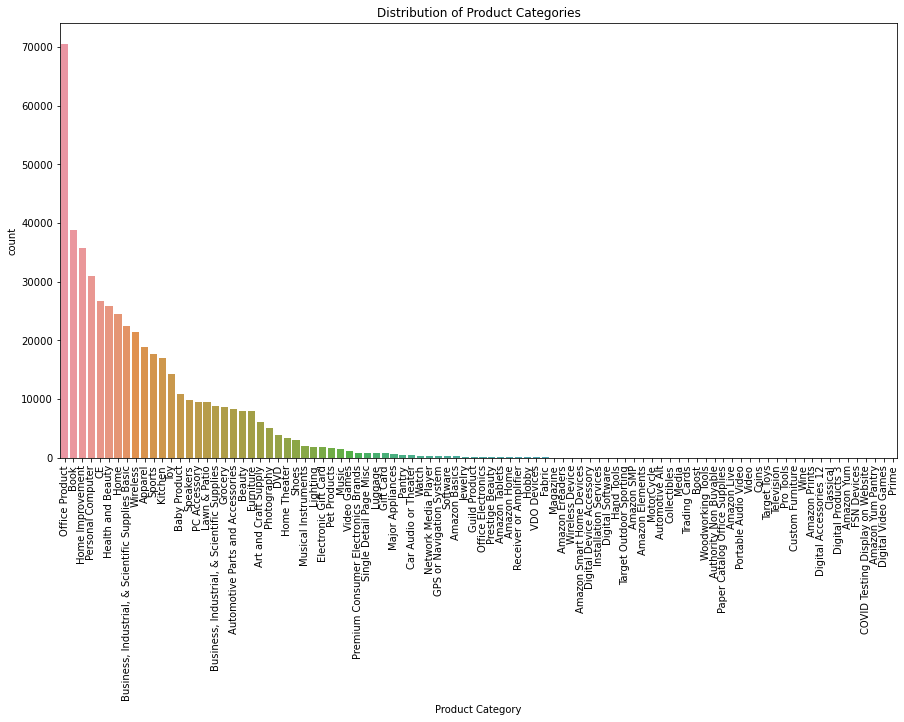

In [13]:

import matplotlib.pyplot as plt
# Visualization of Product Categories
plt.figure(figsize=(15, 8))
sns.countplot(x='Product Category', data=df, order=df['Product Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Product Categories')
plt.show()

In [ ]:
# Pairplot for Numeric Columns
numeric_cols = df.select_dtypes(include='number').columns
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

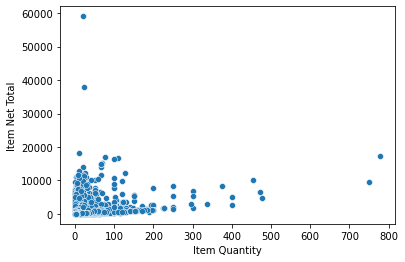

In [14]:
# Bivariate Analysis
sns.scatterplot(x='Item Quantity', y='Item Net Total', data=df)
plt.show()

In [20]:
import pandas as pd

# Assuming df is your DataFrame
df['Order Date'] = pd.to_datetime(df['Order Date']).astype('int64')
df['Payment Date'] = pd.to_datetime(df['Payment Date']).astype('int64')
df['Shipment Date'] = pd.to_datetime(df['Shipment Date']).astype('int64')


C:\Users\prabh\AppData\Local\Temp/ipykernel_25668/2946393442.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['Order Date'] = pd.to_datetime(df['Order Date']).astype('int64')
C:\Users\prabh\AppData\Local\Temp/ipykernel_25668/2946393442.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['Payment Date'] = pd.to_datetime(df['Payment Date']).astype('int64')
C:\Users\prabh\AppData\Local\Temp/ipykernel_25668/2946393442.py:6: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['Shipment Date'] = pd.to_datetime(df['Shipment Date']).astype('int64')


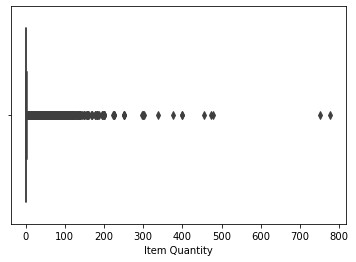

In [21]:
# Outlier Detection
sns.boxplot(x='Item Quantity', data=df)
plt.show()

# Time series analysis

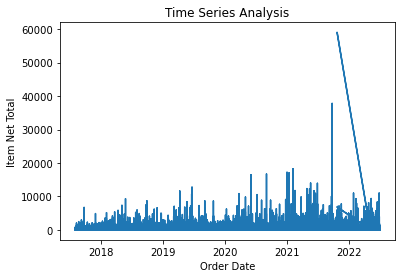

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Order Date' is the timestamp column
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Explore the time series with a simple line plot
plt.plot(df['Item Net Total'])
plt.xlabel('Order Date')
plt.ylabel('Item Net Total')
plt.title('Time Series Analysis')
plt.show()



In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

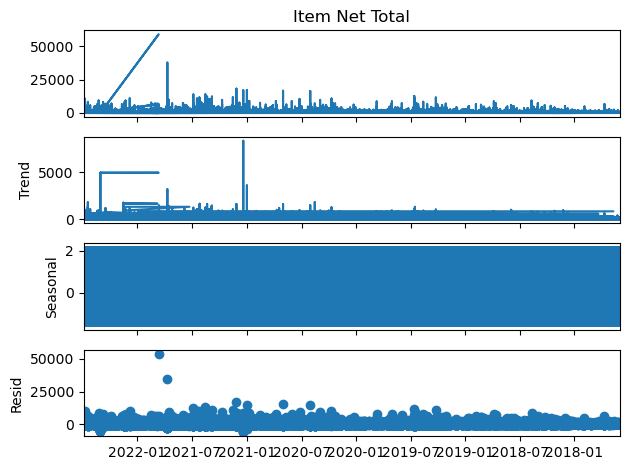

In [29]:
# Seasonal Decomposition
result_seasonal_decomp = seasonal_decompose(df['Item Net Total'], model='additive', period=12)
result_seasonal_decomp.plot()
plt.show()

In [34]:
df['Payment Date'] = pd.to_numeric(df['Payment Date'], errors='coerce')

In [35]:
df['Shipment date'] = pd.to_numeric(df['Shipment Date'], errors='coerce')

In [38]:
# Extract the time series column
time_series_data = df['Item Net Total']

# Fit the Exponential Smoothing model
model_exp_smoothing = ExponentialSmoothing(time_series_data)
results_exp_smoothing = model_exp_smoothing.fit()

# Print summary of Exponential Smoothing model
print("\nExponential Smoothing Model Summary:")
print(results_exp_smoothing.summary())

/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



Exponential Smoothing Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:           Item Net Total   No. Observations:               484244
Model:             ExponentialSmoothing   SSE                    32430644464.914
Optimized:                         True   AIC                        5380935.647
Trend:                             None   BIC                        5380957.827
Seasonal:                          None   AICC                       5380935.647
Seasonal Periods:                  None   Date:                 Wed, 06 Dec 2023
Box-Cox:                          False   Time:                         00:18:22
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0280233                alpha                 T

In [40]:
# ARIMA Model
model_arima = ARIMA(df['Item Net Total'], order=(1, 1, 1))
results_arima = model_arima.fit()

/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._in

In [42]:
print("ARIMA Model Summary:")
print(results_arima.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:         Item Net Total   No. Observations:               484244
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -3372357.381
Date:                Wed, 06 Dec 2023   AIC                        6744720.761
Time:                        00:22:56   BIC                        6744754.032
Sample:                             0   HQIC                       6744730.192
                             - 484244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1580      0.000   1270.113      0.000       0.158       0.158
ma.L1         -0.9969   6.22e-05   -1.6e+04      0.000      -0.997      -0.997
sigma2      6.555e+04      2.19

Index(['Order Date', 'Payment Date', 'Shipment Date', 'Product Category',
       'ASIN', 'Product Title', 'UNSPSC', 'Product Condition', 'Listed PPU',
       'Purchase PPU', 'Item Quantity', 'Item Subtotal',
       'Item Shipping & Handling', 'Item Tax', 'Item Net Total',
       'Seller Name'],
      dtype='object')


/var/folders/01/f1rqdcds5nn4n04t75q76d8005r72x/T/ipykernel_5027/4131226298.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/susaivicta/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated fre

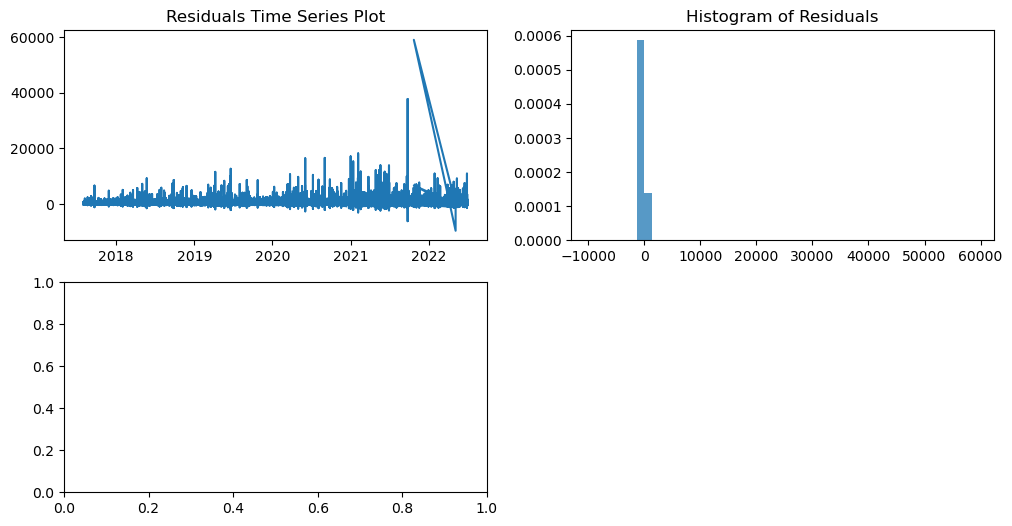

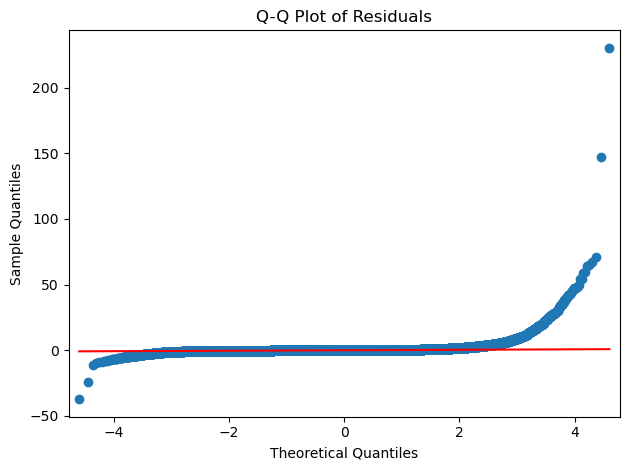

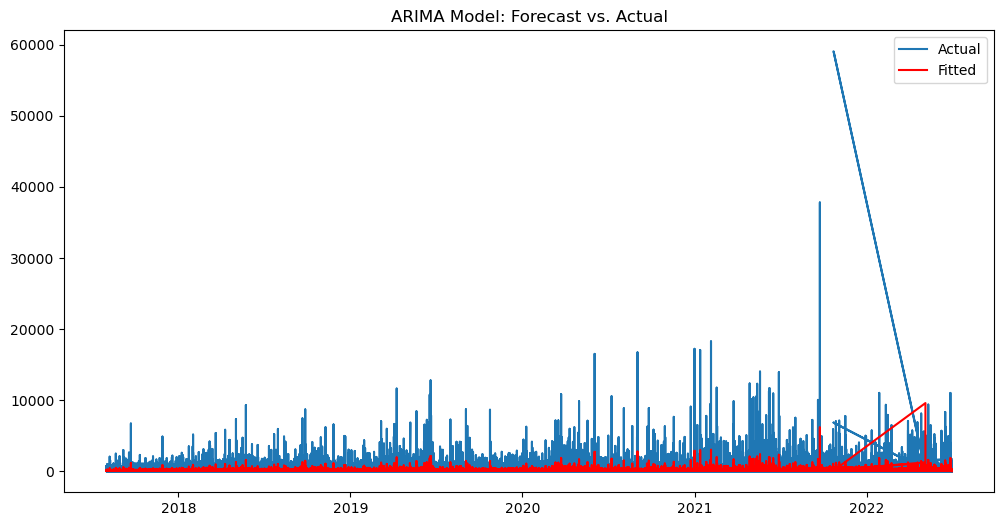

In [67]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


print(df.columns)

# Assuming 'Order Date' is your datetime column
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Fit ARIMA model
model = ARIMA(df['Item Net Total'], order=(1, 1, 1))
results = model.fit()

# Extract residuals
residuals = results.resid

# Visualize residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals Time Series Plot')

plt.subplot(2, 2, 2)
# Histogram of residuals
plt.hist(residuals, bins=50, density=True, alpha=0.75)
plt.title('Histogram of Residuals')

plt.subplot(2, 2, 3)
# Q-Q plot of residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='q', fit=True)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Forecast vs. Actual Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Item Net Total'], label='Actual')
plt.plot(df.index, results.fittedvalues, label='Fitted', color='red')
plt.title('ARIMA Model: Forecast vs. Actual')
plt.legend()
plt.show()


# customer segmentation

In [72]:
# Convert 'Payment Date' to datetime format
df['Payment Date'] = pd.to_datetime(df['Payment Date'])

/var/folders/01/f1rqdcds5nn4n04t75q76d8005r72x/T/ipykernel_5027/4029358338.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Payment Date'] = pd.to_datetime(df['Payment Date'])


In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



In [28]:
pip install --upgrade threadpoolctl

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


C:\Users\prabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               UNSPSC   Listed PPU  Purchase PPU  Item Quantity  \
Cluster                                                           
0        4.560467e+07    52.020945     37.664976       1.688458   
1        4.415485e+07  2372.510069   1157.883724       9.172414   
2        4.678163e+07    17.661483     12.914582      60.160905   
3        4.507898e+07   252.265721    202.663467       8.589986   
4        4.600312e+07  1103.667885    825.707308      95.019231   

         Item Subtotal  Item Shipping & Handling     Item Tax  Item Net Total  
Cluster                                                                        
0            51.014945                  0.530702     4.434660       55.697292  
1          2779.295616                  8.793615   248.809409     3029.180355  
2           716.941320                  4.179395    61.710339      781.335732  
3           452.217252                  2.449904    40.317683      494.008414  
4         11492.814038                 86.704808  

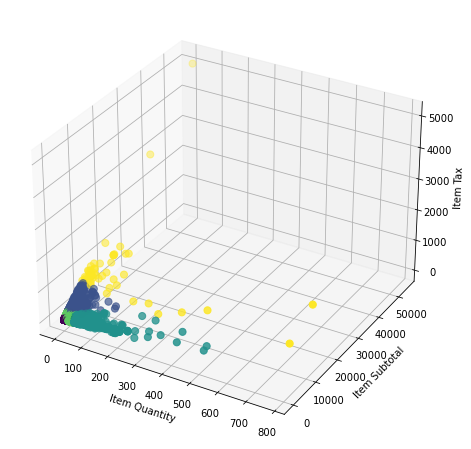

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


selected_features = df[['Item Quantity', 'Item Subtotal', 'Item Tax']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Apply K-Means clustering
optimal_k = 5  # Replace with the optimal K based on your analysis

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the characteristics of each cluster
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

# Visualize the clusters in a 3D plot (for 3 selected features)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Item Quantity'], df['Item Subtotal'], df['Item Tax'], c=df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Item Quantity')
ax.set_ylabel('Item Subtotal')
ax.set_zlabel('Item Tax')

plt.show()


# *Predictive Analysis

In [18]:

threshold = 50
df['PurchaseBehavior'] = (df['Item Subtotal'] > threshold).astype(int)

# Check the distribution of the target variable
print(df['PurchaseBehavior'].value_counts())

PurchaseBehavior
0    307863
1    176381
Name: count, dtype: int64


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X = df[['UNSPSC', 'Listed PPU', 'Purchase PPU', 'Item Quantity', 'Item Subtotal',
        'Item Shipping & Handling', 'Item Net Total']]
y = df['PurchaseBehavior']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Train a decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Train a random forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for all three models
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

# Evaluate the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Evaluate the decision tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Evaluate the random forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Print the evaluation metrics for all three models
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1 Score: {f1_logistic}")
print(f"Confusion Matrix:\n{conf_matrix_logistic}")

print("\nDecision Tree Model:")
print(f"Accuracy: {accuracy_decision_tree}")
print(f"Precision: {precision_decision_tree}")
print(f"Recall: {recall_decision_tree}")
print(f"F1 Score: {f1_decision_tree}")
print(f"Confusion Matrix:\n{conf_matrix_decision_tree}")

print("\nRandom Forest Model:")
print(f"Accuracy: {accuracy_random_forest}")
print(f"Precision: {precision_random_forest}")
print(f"Recall: {recall_random_forest}")
print(f"F1 Score: {f1_random_forest}")
print(f"Confusion Matrix:\n{conf_matrix_random_forest}")



Logistic Regression Model:
Accuracy: 0.9957253043397454
Precision: 0.9986248782444279
Recall: 0.9896093572564161
F1 Score: 0.9940966775987452
Confusion Matrix:
[[61577    48]
 [  366 34858]]

Decision Tree Model:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[61625     0]
 [    0 35224]]

Random Forest Model:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[61625     0]
 [    0 35224]]


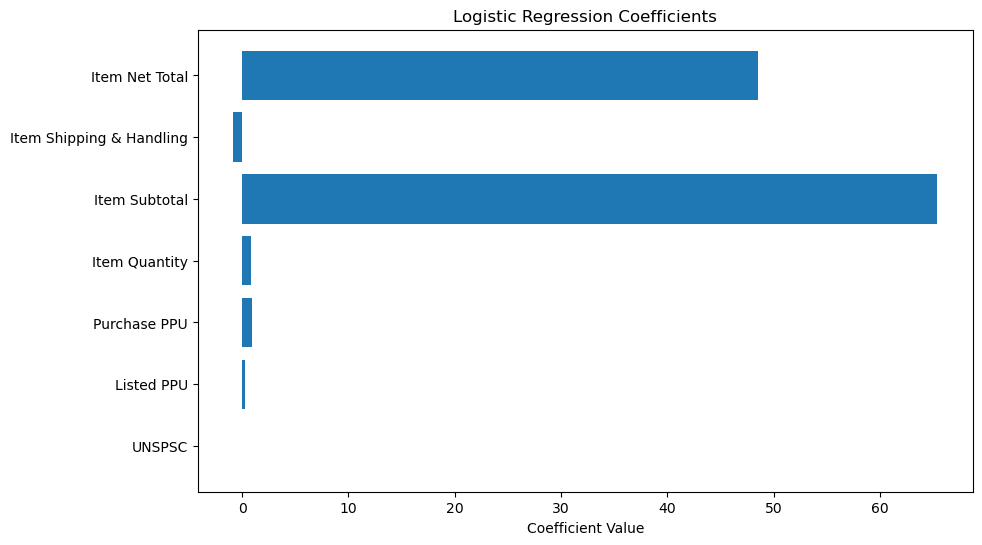

In [28]:
# Assuming 'logistic_model' is your trained Logistic Regression model
coefficients = logistic_model.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()


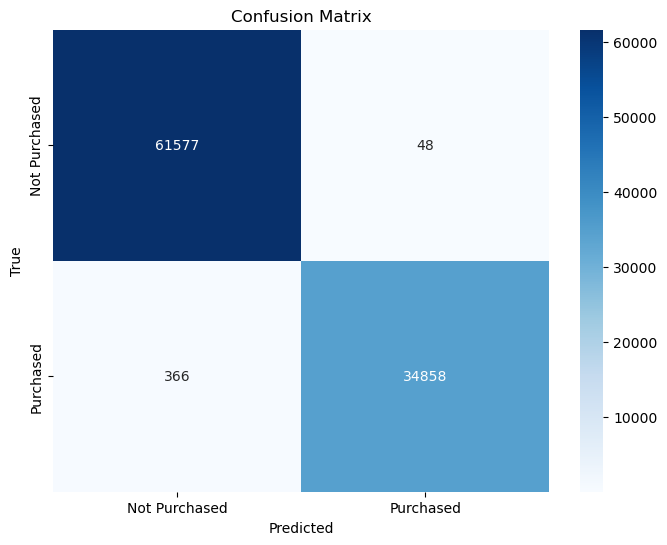

In [35]:
from sklearn.metrics import confusion_matrix

y_pred_logistic = logistic_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [36]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [37]:

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your preprocessed data

df_market_basket = pd.read_csv('amazon_cleaned.csv')


# We will create a new DataFrame suitable for market basket analysis
basket = df_market_basket.groupby(['Order Date', 'ASIN'])['Item Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order Date')

# Convert quantities to binary values (1 or 0)
basket[basket > 1] = 1

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

/Users/susaivicta/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
       support                                          itemsets
0     0.021035                                      (0071441190)
1     0.025583                                      (0071771328)
2     0.042069                                      (0073397105)
3     0.021035                                      (0143127748)
4     0.035816                                      (0399592520)
...        ...                                               ...
1233  0.021603              (B07S4LDHJM, B07GC5QFXB, B07HYK3ZLF)
1234  0.026720              (B07S4LDHJM, B07VPKLBB7, B08KY7QSZL)
1235  0.022740  (B004SUIM4E, B003VAHYNC, B00VXEJ6PC, B0027JBLV4)
1236  0.022172  (B004SUIM4E, B003VAHYNC, B003NR57BY, B00VXEJ6PC)
1237  0.021603  (B004SUIM4E, B003VAHYNC, B00CYX54C0, B00VXEJ6PC)

[1238 rows x 2 columns]

Association Rules:
                   antecedents                           consequents  \
0                 (B00005OU7B)                          (159562015X)   
1           